/Users/Uni/Documents/Uni/Thesis/Cuneiform Tests/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/__6_1_HS_903_02_left.png


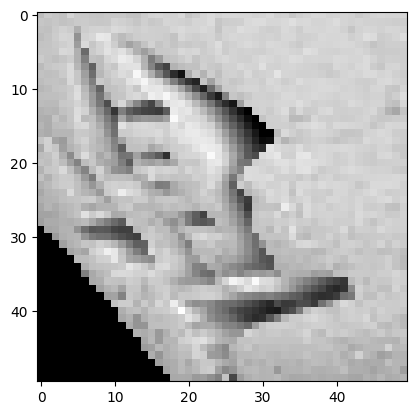

In [8]:
import cv2
import numpy as np
import os#
import matplotlib.pyplot as plt

# define the paths to a stack of test images
test_stack = [
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/__6_1_HS_903_02_left.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/_1_-1_-1_HS_0138_03_front.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/_1_-1_-1_HS_0044_02_left.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/_1_-1_-1_HS_0165_03_front.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/_1_-1_-1_HS_762_06_back.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/_1_-1_-1_HS_769_03_front.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/_1_-1_-1_HS_876_03_front.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/_1_-1_-1_HS_1001_06_back.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/_1_-1_-1_HS_1403_03_front.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/_1_5_8_HS_1143_06_back.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/zur_1_5_5_HS_816_03_front.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/ti_1_-1_-1_HS_832_06_back.png",
    "/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/zu2_1_20_4_HS_1161_06_back.png",
]
path_input = os.getcwd() + test_stack[0]
print(path_input)

# create np array from image
img = cv2.imread(path_input)

# reshape np-array of image to 50x50 pixels
img = cv2.resize(img, (50, 50))
# show the image
plt.imshow(img)

In [9]:
from keras.models import Model, load_model

# Load latest .keras-model from directory model_outputs
# only if file ends with .keras
all_models = [f for f in os.listdir('model_outputs') if f.endswith('.keras')]
all_models.sort()
print("List of models: ", all_models)
newest_model = all_models[-1]

first_model = load_model(os.path.join('model_outputs', newest_model))

List of models:  ['first_15.05.2024_14:18:55.keras']


In [10]:
# Reshape the image to have a single channel
sample_input = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sample_input = np.expand_dims(sample_input, axis=2)
sample_input = sample_input.reshape(1, 50, 50, 1)

# ensure sample_input is non-color

# Make the prediction
prediction = first_model.predict(sample_input)

# Get the predicted class
predicted_class = np.argmax(prediction)

# Print the predicted class
print(predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
562


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


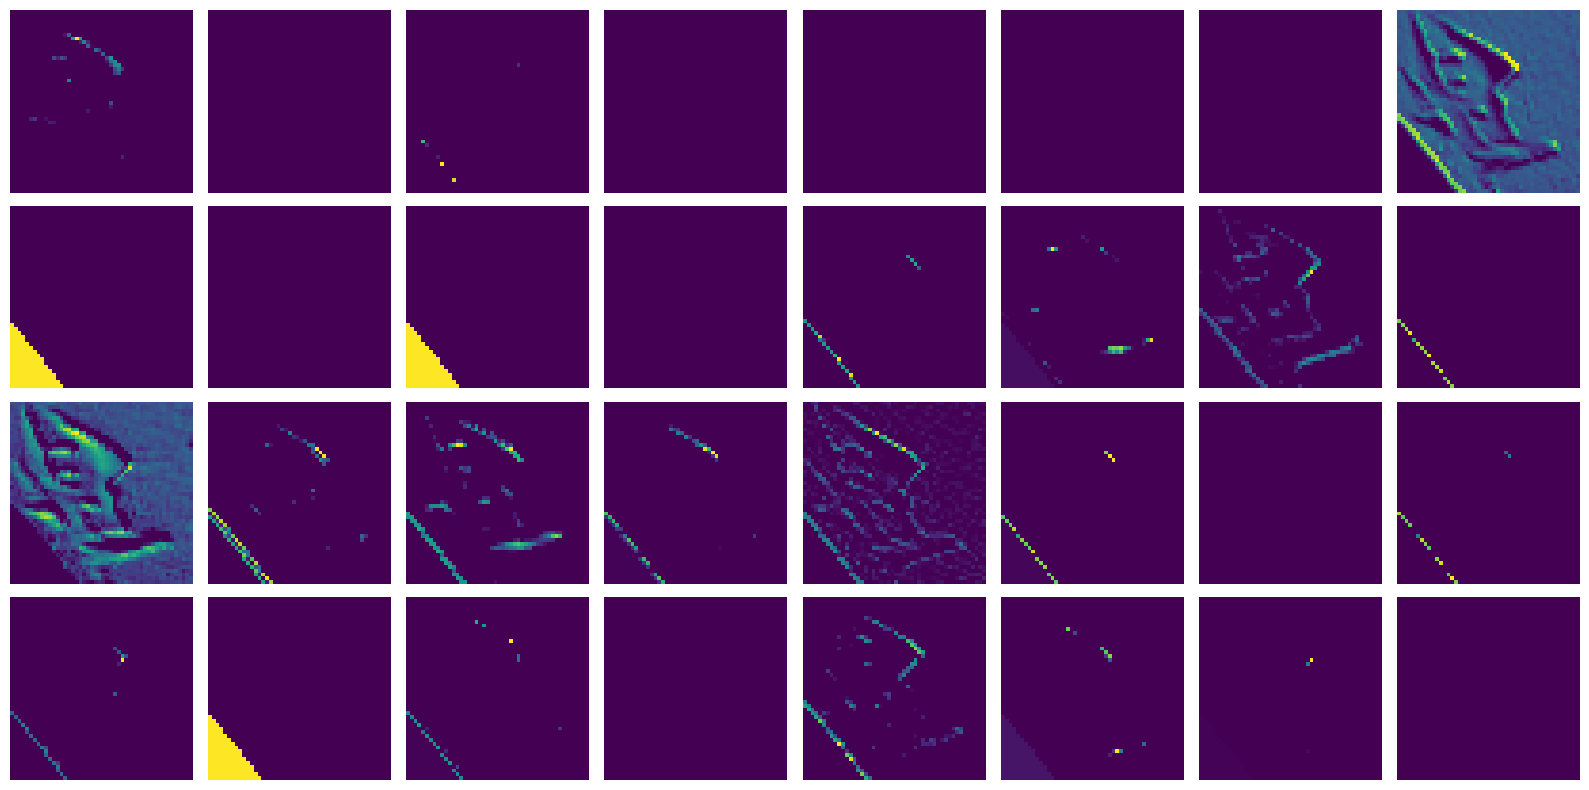

In [11]:
# Get the output of layer 1
layer1_output = first_model.layers[0].output

# Create a new model that only includes layer 1
layer1_model = Model(inputs=first_model.inputs, outputs=layer1_output)

# Pass the input image through layer 1 to get the feature maps
feature_maps = layer1_model.predict(sample_input)


# plot in grid
num_rows = 4
num_cols = 8
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 8))
axs = axs.flatten()
for i in range(feature_maps.shape[-1]):
    axs[i].imshow(feature_maps[0, :, :, i])
    axs[i].axis('off')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

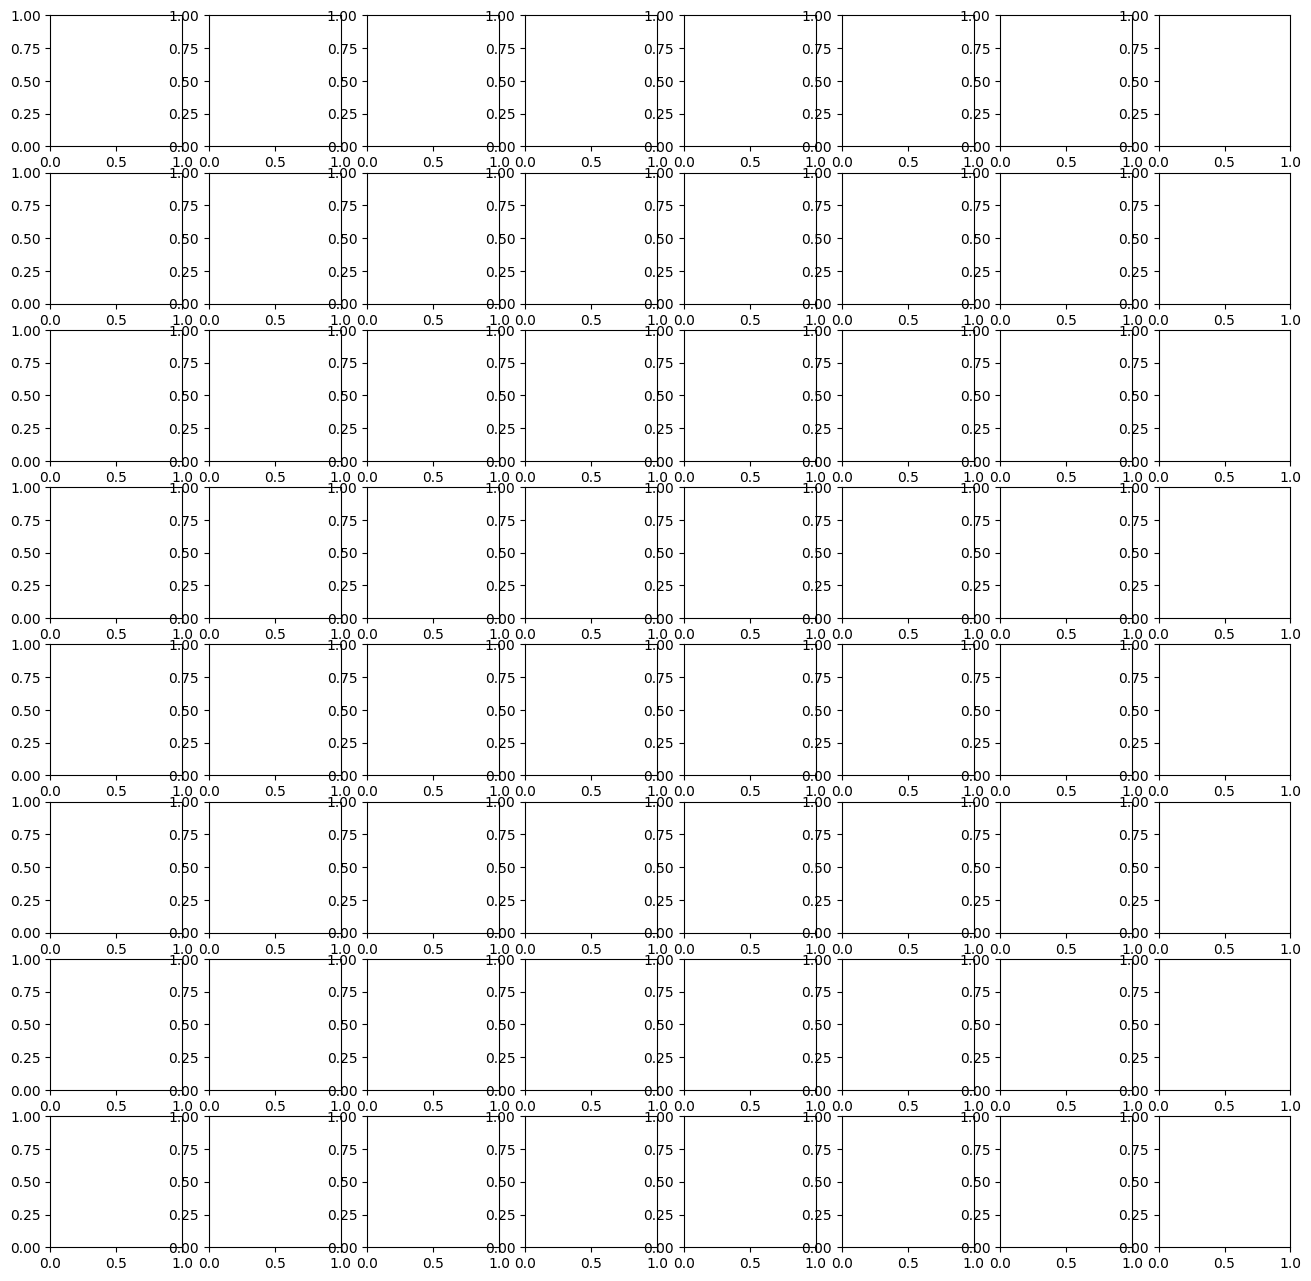

In [12]:
# repeat for layer 3
import matplotlib.pyplot as plt
from keras.models import Model

# Get the output of layer 3
layer3_output = first_model.layers[2].output

# Create a new model that only includes layer 3
layer3_model = Model(inputs=first_model.inputs, outputs=layer3_output)

# Pass the input image through layer 3 to get the feature maps
feature_maps = layer3_model.predict(sample_input)

# plot in grid
num_rows = 8
num_cols = 8
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
axs = axs.flatten()
for i in range(feature_maps.shape[-1]):
    axs[i].imshow(feature_maps[0, :, :, i])
    axs[i].axis('off')
plt.tight_layout()
plt.show()




predicted image: szu_1_-1_-1_HS_781_03_front.png


/var/folders/k9/2d6w8nqj7bz_q__z86ztp1gw0000gp/T/ipykernel_40473/3027575062.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_prediction = df.loc[predicted_class][0]


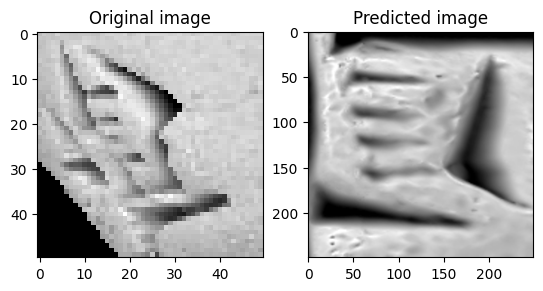

In [ ]:
# create dataframe from csv file
import pandas as pd

# read "df_images.csv" file into pandas dataframe 
# use first column for index
df = pd.read_csv('df_images.csv', sep=';', index_col=0)

#df.head()

# match the predicted class with the corresponding index in the dataframe
img_prediction = df.loc[predicted_class][0]
print("predicted image:", img_prediction)

# build the path to the image and plot it using matplotlib
path_prediction = os.getcwd()+"/MaiCuBeDa/MaiCuBeDa_Annotations_Mixed/char/"+img_prediction
img_prediction = cv2.imread(path_prediction)

# show both images as plots again but this time next to each other
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[0].set_title("Original image")
ax[1].imshow(img_prediction)
ax[1].set_title("Predicted image")
plt.show()